In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


In [3]:
data=pd.read_excel(r"C:\Users\USER\Downloads\family_financial_and_transactions_data.xlsx")

In [4]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [5]:
data.isnull().sum()

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [6]:
data.dtypes

Family ID                          object
Member ID                          object
Transaction Date           datetime64[ns]
Category                           object
Amount                            float64
Income                              int64
Savings                             int64
Monthly Expenses                    int64
Loan Payments                       int64
Credit Card Spending                int64
Dependents                          int64
Financial Goals Met (%)             int64
dtype: object

In [7]:
unique_values = data['Category'].nunique() 
unique_values

7

In [8]:
"""from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the 'Category' column to numeric
data['Category'] = label_encoder.fit_transform(data['Category'])

print("\nDataFrame after Label Encoding:")
data.head()"""

'from sklearn.preprocessing import LabelEncoder\n\n# Create a LabelEncoder object\nlabel_encoder = LabelEncoder()\n\n# Convert the \'Category\' column to numeric\ndata[\'Category\'] = label_encoder.fit_transform(data[\'Category\'])\n\nprint("\nDataFrame after Label Encoding:")\ndata.head()'

In [9]:
transactions = pd.DataFrame(data)

#Family-Level Spending

family_spending = transactions.groupby('Family ID').agg({'Amount': 'sum'}).reset_index()
print("Family-Level Spending:")
family_spending

# Member-Level Spending
member_spending = transactions.groupby(['Family ID', 'Member ID']).agg({'Amount': 'sum'}).reset_index()
print("\nMember-Level Spending:")
member_spending


Family-Level Spending:

Member-Level Spending:


,Family ID,Member ID,Amount
0,FAM001,FAM001_Member1,6521.20
1,FAM001,FAM001_Member2,7084.83
2,FAM001,FAM001_Member3,2119.41
3,FAM001,FAM001_Member4,7463.46
4,FAM002,FAM002_Member1,3082.90
...,...,...,...
921,FAM200,FAM200_Member2,2103.85
922,FAM200,FAM200_Member3,4671.33
923,FAM200,FAM200_Member4,3739.52
924,FAM200,FAM200_Member5,5408.28


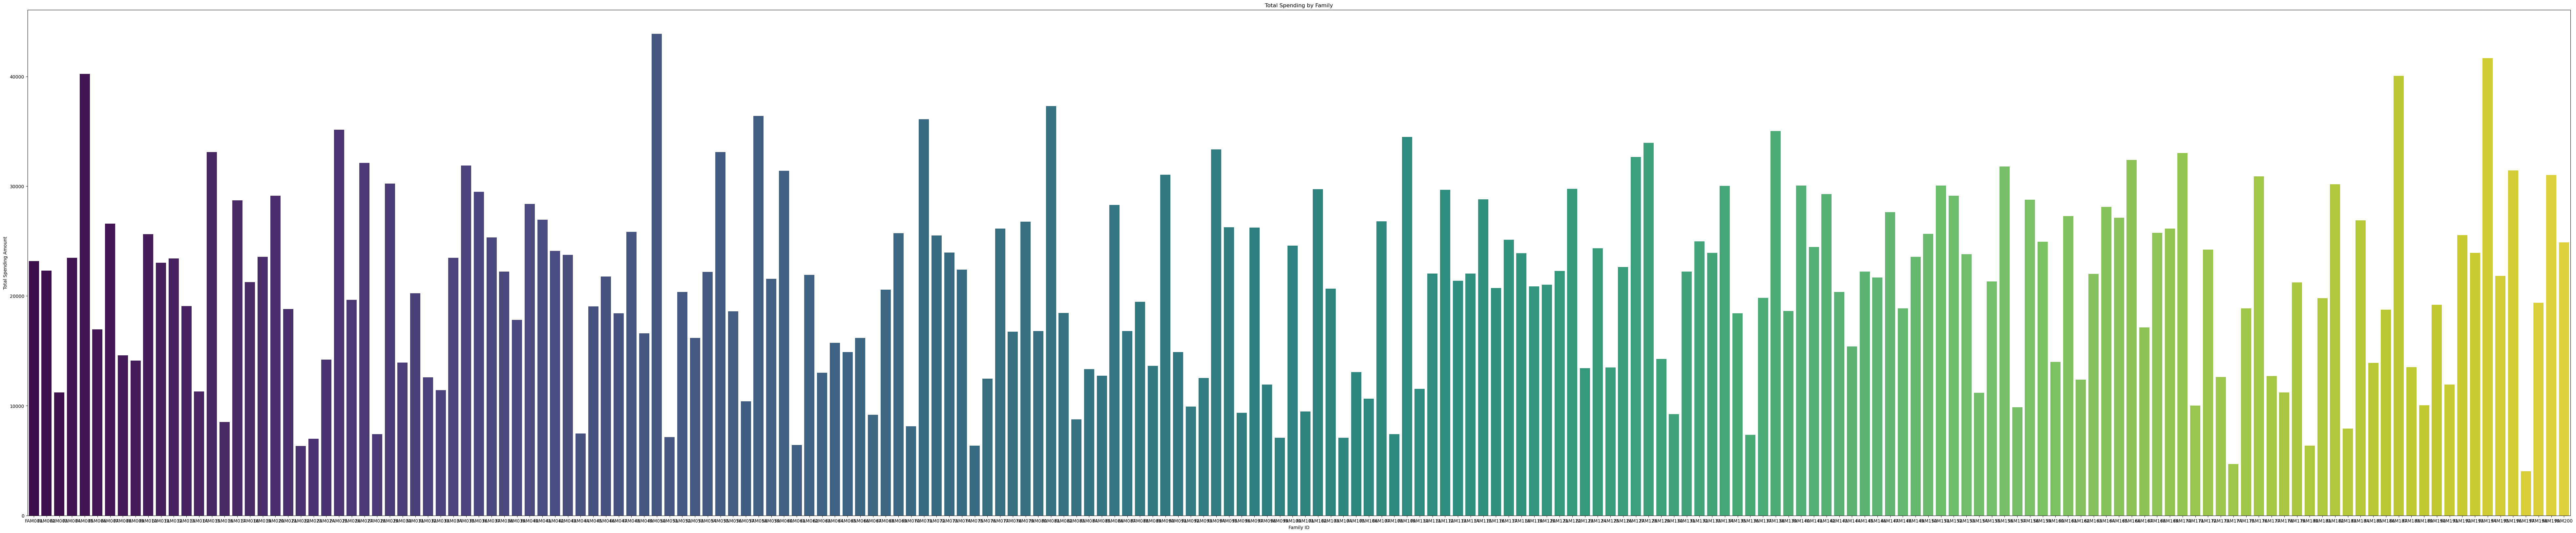

In [10]:


# Plot 1: Family-Level Spending
plt.figure(figsize=(100, 20))
sns.barplot(data=family_spending, x='Family ID', y='Amount', palette='viridis')
plt.title('Total Spending by Family')
plt.xlabel('Family ID')
plt.ylabel('Total Spending Amount')
plt.xticks(rotation=0)
plt.show()


In [11]:
"""# Plot 2: Member-Level Spending
plt.figure(figsize=(100,60))
member_spending_pivot = member_spending.pivot(index='Family ID', columns='Member ID', values='Amount').fillna(0)
member_spending_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Spending by Family Members')
plt.xlabel('Family ID')
plt.ylabel('Spending Amount')
plt.xticks(rotation=0)
#plt.legend(title='Member ID')
plt.show()
"""

"# Plot 2: Member-Level Spending\nplt.figure(figsize=(100,60))\nmember_spending_pivot = member_spending.pivot(index='Family ID', columns='Member ID', values='Amount').fillna(0)\nmember_spending_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))\nplt.title('Spending by Family Members')\nplt.xlabel('Family ID')\nplt.ylabel('Spending Amount')\nplt.xticks(rotation=0)\n#plt.legend(title='Member ID')\nplt.show()\n"

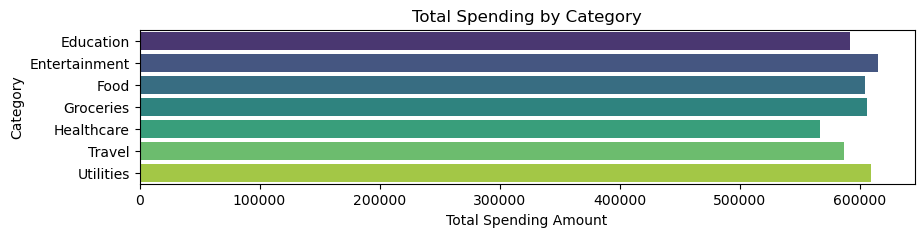

In [12]:
# Plot 3: Spending by Category
category_spending = transactions.groupby('Category').agg({'Amount': 'sum'}).reset_index()

plt.figure(figsize=(10, 2))
sns.barplot(data=category_spending, y='Category', x='Amount', palette='viridis')
plt.title('Total Spending by Category')
plt.xlabel('Total Spending Amount')
plt.ylabel('Category')
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the 'Category' column to numeric
data['Category'] = label_encoder.fit_transform(data['Category'])

print("\nDataFrame after Label Encoding:")
data.head()


DataFrame after Label Encoding:


,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,5,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,5,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,3,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,4,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,0,206.42,113810,20234,5781,2422,2959,2,68


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Convert the 'Category' column to numeric
data['Family ID'] = label_encoder.fit_transform(data['Family ID'])

data['Member ID'] = label_encoder.fit_transform(data['Member ID'])

print("\nDataFrame after Label Encoding:")
data.head()


DataFrame after Label Encoding:


,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,0,0,2024-10-07,5,409.12,113810,20234,5781,2422,2959,2,68
1,0,0,2024-10-16,5,270.91,113810,20234,5781,2422,2959,2,68
2,0,0,2024-10-17,3,91.10,113810,20234,5781,2422,2959,2,68
3,0,0,2024-10-25,4,198.23,113810,20234,5781,2422,2959,2,68
4,0,0,2024-10-25,0,206.42,113810,20234,5781,2422,2959,2,68


In [15]:
# correlation b/w all values 
financial_data = pd.DataFrame(data)
# Calculate correlation matrix
correlation_matrix = financial_data.corr()
# Display the correlation matrix
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
Family ID,1.000000,0.999888,0.009618,-0.003940,-0.002194,0.117740,-0.010819,0.048687,-0.112698,-0.113763,0.036725,-0.061692
Member ID,0.999888,1.000000,0.009632,-0.003909,-0.002041,0.117714,-0.010037,0.050076,-0.115054,-0.111984,0.037258,-0.061914
Transaction Date,0.009618,0.009632,1.000000,0.001315,-0.002060,0.002240,0.004541,-0.007445,-0.007741,0.001842,0.007006,-0.008813
Category,-0.003940,-0.003909,0.001315,1.000000,0.007969,0.004055,0.003760,-0.011535,0.002621,0.015187,0.002811,0.004188
Amount,-0.002194,-0.002041,-0.002060,0.007969,1.000000,0.005241,-0.010441,-0.000768,-0.008636,-0.006182,-0.000124,-0.006395
Income,0.117740,0.117714,0.002240,0.004055,0.005241,1.000000,-0.108340,-0.041355,-0.073053,-0.123225,0.005717,-0.094626
Savings,-0.010819,-0.010037,0.004541,0.003760,-0.010441,-0.108340,1.000000,-0.082094,-0.125158,0.022499,-0.012153,-0.090095
Monthly Expenses,0.048687,0.050076,-0.007445,-0.011535,-0.000768,-0.041355,-0.082094,1.000000,-0.052883,-0.046059,0.028577,0.003698
Loan Payments,-0.112698,-0.115054,-0.007741,0.002621,-0.008636,-0.073053,-0.125158,-0.052883,1.000000,0.025535,-0.019567,0.034911
Credit Card Spending,-0.113763,-0.111984,0.001842,0.015187,-0.006182,-0.123225,0.022499,-0.046059,0.025535,1.000000,-0.033939,0.010204


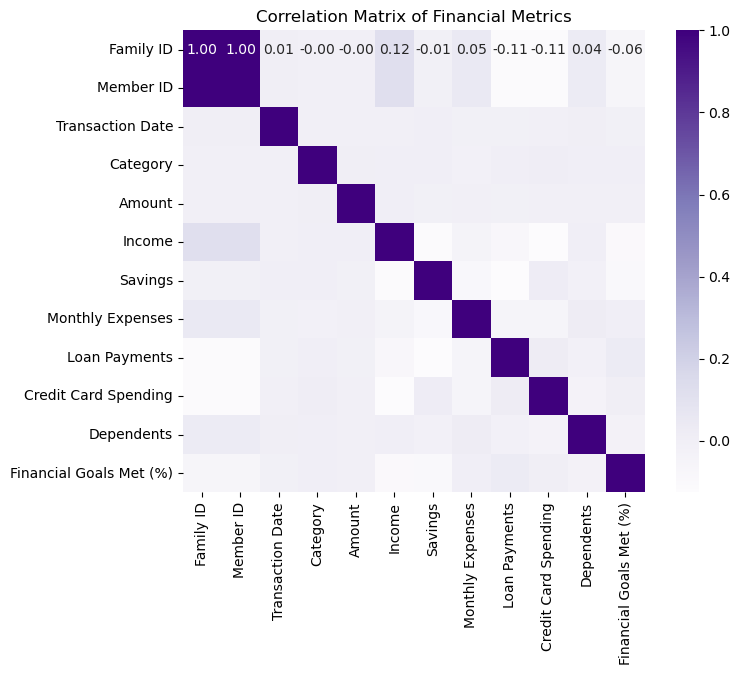

In [16]:

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', square=True)
plt.title('Correlation Matrix of Financial Metrics')
plt.show()

In [17]:
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,0,0,2024-10-07,5,409.12,113810,20234,5781,2422,2959,2,68
1,0,0,2024-10-16,5,270.91,113810,20234,5781,2422,2959,2,68
2,0,0,2024-10-17,3,91.10,113810,20234,5781,2422,2959,2,68
3,0,0,2024-10-25,4,198.23,113810,20234,5781,2422,2959,2,68
4,0,0,2024-10-25,0,206.42,113810,20234,5781,2422,2959,2,68


In [18]:
# Apply condition to create a new column 'Rating'
data['financial_health'] = data['Financial Goals Met (%)'].apply(lambda x: 'good' if x > 50 else 'improve for good health')

print("\nUpdated DataFrame with Ratings:")
data


Updated DataFrame with Ratings:


,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),financial_health
0,0,0,2024-10-07,5,409.12,113810,20234,5781,2422,2959,2,68,good
1,0,0,2024-10-16,5,270.91,113810,20234,5781,2422,2959,2,68,good
2,0,0,2024-10-17,3,91.10,113810,20234,5781,2422,2959,2,68,good
3,0,0,2024-10-25,4,198.23,113810,20234,5781,2422,2959,2,68,good
4,0,0,2024-10-25,0,206.42,113810,20234,5781,2422,2959,2,68,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,199,925,2024-10-10,3,79.99,44621,44081,4296,2470,2831,4,92,good
16302,199,925,2024-10-22,0,228.39,44621,44081,4296,2470,2831,4,92,good
16303,199,925,2024-10-29,5,258.63,44621,44081,4296,2470,2831,4,92,good
16304,199,925,2024-10-26,5,467.46,44621,44081,4296,2470,2831,4,92,good


In [19]:
data.dtypes

Family ID                           int32
Member ID                           int32
Transaction Date           datetime64[ns]
Category                            int32
Amount                            float64
Income                              int64
Savings                             int64
Monthly Expenses                    int64
Loan Payments                       int64
Credit Card Spending                int64
Dependents                          int64
Financial Goals Met (%)             int64
financial_health                   object
dtype: object

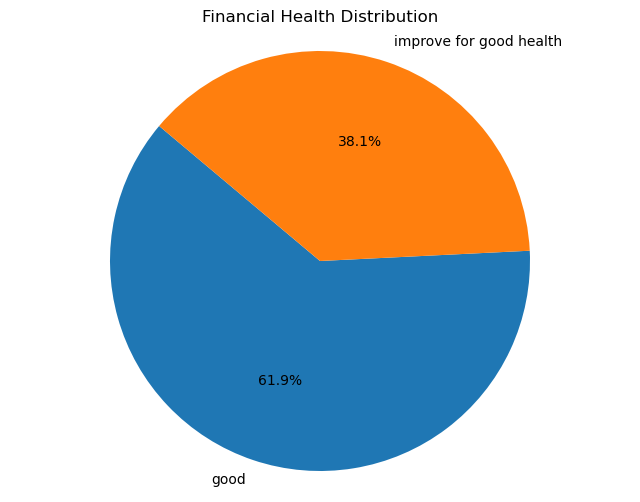

In [20]:

# Count occurrences of each category
health_counts = data['financial_health'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.pie(health_counts, labels=health_counts.index,  autopct='%1.1f%%',startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.title('Financial Health Distribution')  # Title of the pie chart
plt.show()  # Display the pie chart

In [21]:
health_counts = data['financial_health'].value_counts()

In [22]:
health_counts

financial_health
good                       10092
improve for good health     6214
Name: count, dtype: int64

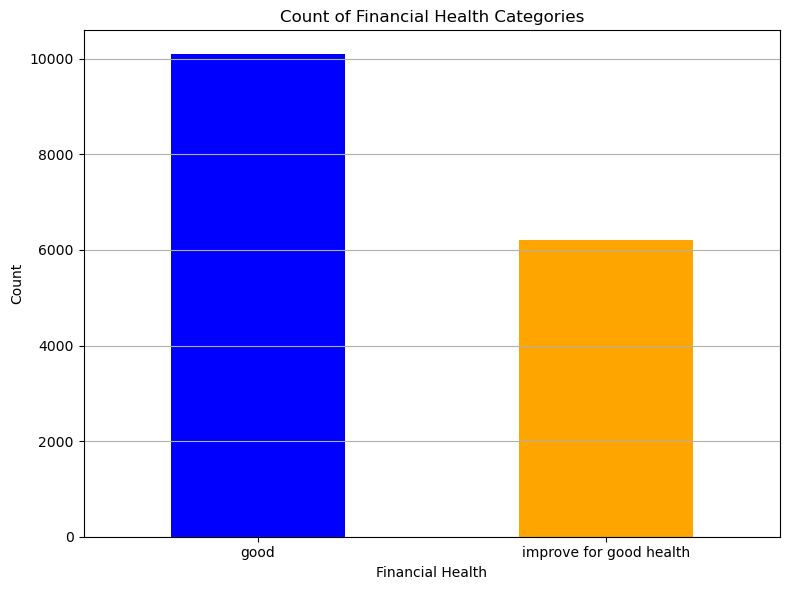

In [23]:
# Count occurrences of each category in the 'financial_health' column
health_counts = data['financial_health'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
health_counts.plot(kind='bar', color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Financial Health')
plt.ylabel('Count')
plt.title('Count of Financial Health Categories')
plt.xticks(rotation=0)  # Rotate x labels to horizontal
plt.grid(axis='y')  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
data.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)',
       'financial_health'],
      dtype='object')

### Financial Health Score

In [35]:

import pandas as pd

class FinancialHealthScore:
    def __init__(self, income, savings, monthly_expenses, loan_payments,
                 credit_card_spending, financial_goals_met):
        self.income = income
        self.savings = savings
        self.monthly_expenses = monthly_expenses
        self.loan_payments = loan_payments
        self.credit_card_spending = credit_card_spending
        self.financial_goals_met = financial_goals_met

    def calculate_scores(self):
        # Calculate ratios and scores
        savings_to_income_ratio = (self.savings / self.income) * 100 if self.income > 0 else 0
        monthly_expenses_percentage = (self.monthly_expenses / self.income) * 100 if self.income > 0 else 0
        loan_payments_percentage = (self.loan_payments / self.income) * 100 if self.income > 0 else 0
        credit_card_trend_score = self.credit_card_spending  # Assuming this is already a score from 0-100

        # Calculate scores based on the defined logic
        expenses_score = 100 - monthly_expenses_percentage
        loan_payments_score = 100 - loan_payments_percentage
        goals_met_score = self.financial_goals_met  # Already a percentage

        # Calculate total score
        total_score = (
            (savings_to_income_ratio * 0.20) +
            (expenses_score * 0.20) +
            (loan_payments_score * 0.20) +
            (credit_card_trend_score * 0.15) +
            (goals_met_score * 0.10)
        )

        return total_score


def calculate_financial_scores(df):
    scores = []
    for index, row in df.iterrows():
        score_calculator = FinancialHealthScore(
            income=row['Income'],
            savings=row['Savings'],
            monthly_expenses=row['Monthly Expenses'],
            loan_payments=row['Loan Payments'],
            credit_card_spending=row['Credit Card Spending'],
            financial_goals_met=row['Financial Goals Met (%)']
        )
        score = score_calculator.calculate_scores()
        scores.append(score)
    
    return scores

# Example usage
if __name__ == "__main__":
    # Load the data (replace 'your_data.csv' with your actual file path)
    df = pd.read_excel(r"C:\Users\USER\Downloads\family_financial_and_transactions_data.xlsx")

    # Calculate financial health scores
    df['financial_health'] = calculate_financial_scores(df)

    # Output the results
    print(df[['Family ID', 'Member ID', 'financial_health']])

      Family ID       Member ID  financial_health
0        FAM001  FAM001_Member1        492.764225
1        FAM001  FAM001_Member1        492.764225
2        FAM001  FAM001_Member1        492.764225
3        FAM001  FAM001_Member1        492.764225
4        FAM001  FAM001_Member1        492.764225
...         ...             ...               ...
16301    FAM200  FAM200_Member6        490.575309
16302    FAM200  FAM200_Member6        490.575309
16303    FAM200  FAM200_Member6        490.575309
16304    FAM200  FAM200_Member6        490.575309
16305    FAM200  FAM200_Member6        490.575309

[16306 rows x 3 columns]


In [36]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%),financial_health
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68,492.764225
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68,492.764225
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68,492.764225
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68,492.764225
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68,492.764225


### visualization for FinancialHealthScore

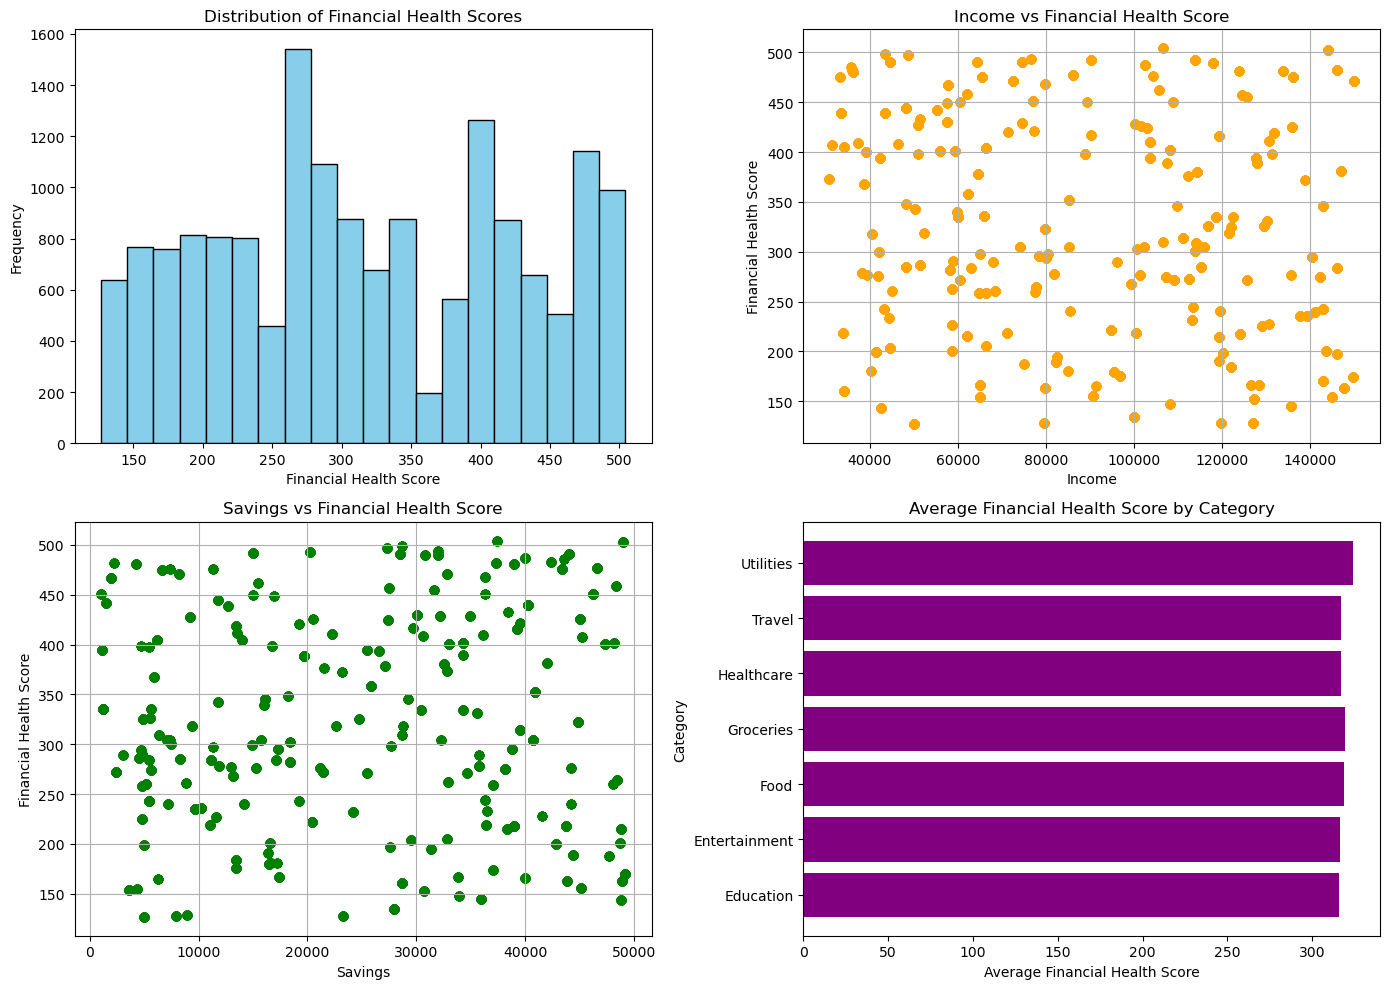

In [42]:
# visualization for FinancialHealthScore

plt.figure(figsize=(14, 10))

# Histogram of Financial Health Scores
plt.subplot(2, 2, 1)
plt.hist(df['financial_health'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Financial Health Scores')
plt.xlabel('Financial Health Score')
plt.ylabel('Frequency')

# Scatter plot of Income vs Financial Health Score
plt.subplot(2, 2, 2)
plt.scatter(df['Income'], df['financial_health'], alpha=0.6, color='orange')
plt.title('Income vs Financial Health Score')
plt.xlabel('Income')
plt.ylabel('Financial Health Score')
plt.grid()

# Scatter plot of Savings vs Financial Health Score
plt.subplot(2, 2, 3)
plt.scatter(df['Savings'], df['financial_health'], alpha=0.6, color='green')
plt.title('Savings vs Financial Health Score')
plt.xlabel('Savings')
plt.ylabel('Financial Health Score')
plt.grid()


# Bar plot of average financial health score by category (if applicable)
if 'Category' in df.columns:
    avg_scores_by_category = df.groupby('Category')['financial_health'].mean().reset_index()
    plt.subplot(2, 2, 4)
    plt.barh(avg_scores_by_category['Category'], avg_scores_by_category['financial_health'], color='purple')
    plt.title('Average Financial Health Score by Category')
    plt.xlabel('Average Financial Health Score')
    plt.ylabel('Category')
plt.tight_layout()    
plt.show()

### Credit Card Spending Distribution Across Categories

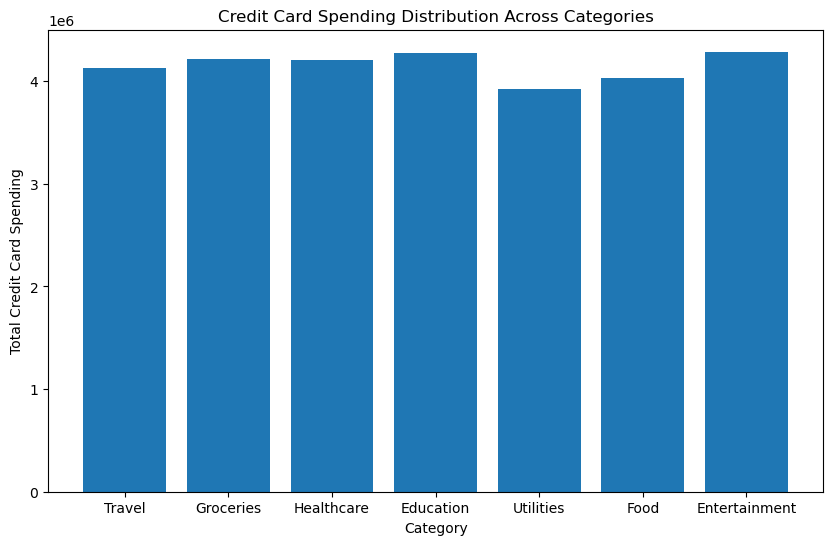

In [49]:


# Assuming 'df' is the DataFrame with spending data
categories = df['Category'].unique()
spending_by_category = df.groupby('Category')['Credit Card Spending'].sum()

plt.figure(figsize=(10, 6))
plt.bar(categories, spending_by_category)
plt.xlabel('Category')
plt.ylabel('Total Credit Card Spending')
plt.title('Credit Card Spending Distribution Across Categories')
plt.show()

##### This bar chart shows the total "Credit Card Spending"  across different categories, helping you identify which categories have the highest spending.

In [47]:
data["Credit Card Spending"].values

array([2959, 2959, 2959, ..., 2831, 2831, 2831], dtype=int64)

### Family-Wise financial_health

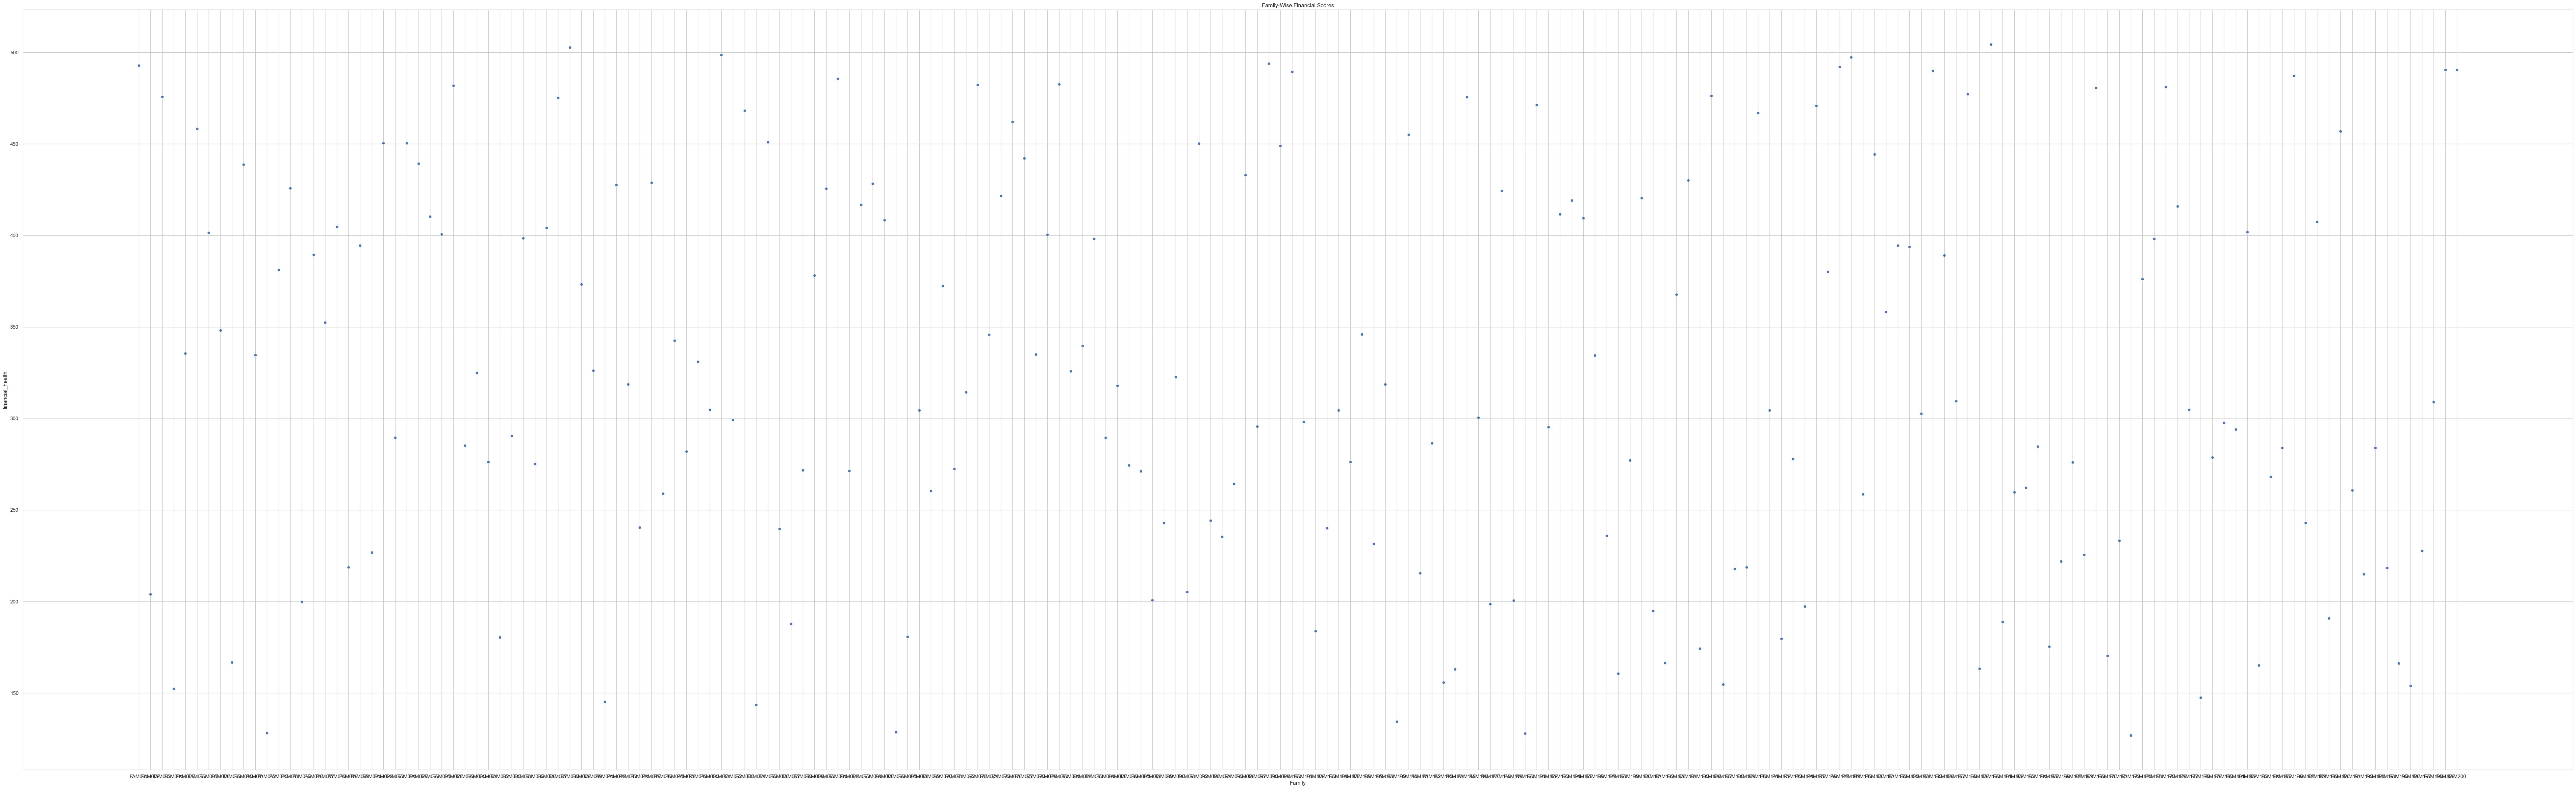

In [56]:
sns.set(style="whitegrid")

plt.figure(figsize=(100, 30))
sns.scatterplot(x='Family ID', y='financial_health', data=df)
plt.xlabel('Family')
plt.ylabel('financial_health')
plt.title('Family-Wise Financial Scores')
plt.show()